# EDA

In [1]:
pwd

'C:\\Users\\jerem\\Desktop\\nonsense\\flagship'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

#### Import data

In [3]:
toy_dataset_df = pd.read_csv('toy_dataset_1_10_23.csv')
toy_products_df = pd.read_csv('toy_products_1_10_23.csv')

print(toy_products_df.shape)
print(toy_dataset_df.shape)

(3125, 6)
(32151, 23)


### Toy Products

In [4]:
toy_products_df.head()

,product_id,product_title,product_category,sale_amount,product_color,product_gender
0,6134,Alley Boot,Boot,214,Midnight Green (Eagle Green),Men
1,6134,Alley Boot,Boot,214,Midnight Green (Eagle Green),Women
2,6134,Alley Boot,Boot,214,Midnight Green (Eagle Green),Kids
3,6134,Alley Boot,Boot,214,Midnight Green (Eagle Green),Youth
4,6134,Alley Boot,Boot,214,Midnight Green (Eagle Green),Unisex


In [5]:
# TODO - create unique product identifier

In [6]:
# Display basic dataframe info
print(toy_products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        3125 non-null   int64 
 1   product_title     3125 non-null   object
 2   product_category  3125 non-null   object
 3   sale_amount       3125 non-null   int64 
 4   product_color     3125 non-null   object
 5   product_gender    3125 non-null   object
dtypes: int64(2), object(4)
memory usage: 146.6+ KB
None


In [7]:
# Display basic statistics for numerical columns
toy_products_df.describe()

,product_id,sale_amount
count,3125.000000,3125.000000
mean,4608.458240,237.600640
std,2910.735893,101.247278
min,538.000000,81.000000
25%,1921.000000,179.000000
50%,4839.000000,214.000000
75%,6134.000000,308.000000
max,9872.000000,478.000000


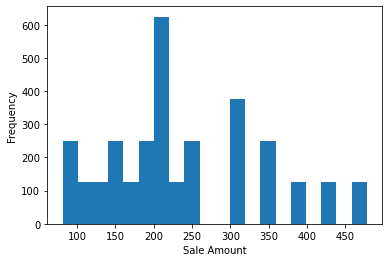

In [8]:
# Visualize the distribution of sale amounts using a histogram
plt.hist(toy_products_df['sale_amount'], bins=20)
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.show()

In [9]:
toy_products_df['product_title'].nunique()

25

In [10]:
toy_products_df['product_title'].value_counts()

Marathon Running       126
Hustler Boot           125
Original Boot          125
Corner Sandal          125
Alley Boot             125
Vanguard Sandal        125
Roundup Boot           125
Rogue Sneaker          125
Gator Sandal           125
Stacked Hiking Boot    125
Boost Boot             125
Olympic Running        125
Descent Running        125
Bejeweled Boot         125
Forest Sandal          125
Naive Boot             125
Scalar Sandal          125
Envy Sandal            125
Training Sneaker       125
Discrete Sandal        125
Evermore Boot          125
Gradient Sneaker       125
Classic Sneaker        125
Iron Running           125
League Running         124
Name: product_title, dtype: int64

In [11]:
toy_products_df['product_id'].nunique()

24

In [12]:
# look at product titles that share ID
title_count = toy_products_df.groupby('product_id')['product_title'].nunique()
title_count[title_count > 1].index.tolist()

[1983]

In [13]:
toy_products_df[toy_products_df['product_id']==1983]

,product_id,product_title,product_category,sale_amount,product_color,product_gender
750,1983,Evermore Boot,Boot,245,Midnight Green (Eagle Green),Men
751,1983,Evermore Boot,Boot,245,Midnight Green (Eagle Green),Women
752,1983,Evermore Boot,Boot,245,Midnight Green (Eagle Green),Kids
753,1983,Evermore Boot,Boot,245,Midnight Green (Eagle Green),Youth
754,1983,Evermore Boot,Boot,245,Midnight Green (Eagle Green),Unisex
...,...,...,...,...,...,...
2245,1983,Stacked Hiking Boot,Boot,149,Selective Yellow,Men
2246,1983,Stacked Hiking Boot,Boot,149,Selective Yellow,Women
2247,1983,Stacked Hiking Boot,Boot,149,Selective Yellow,Kids
2248,1983,Stacked Hiking Boot,Boot,149,Selective Yellow,Youth


In [14]:
# check for products that span categories
category_count = toy_products_df.groupby('product_id')['product_category'].nunique()
category_count[category_count > 1].index.tolist()

[]

#### Product Category

In [15]:
# Count unique values of categoricals
toy_products_df['product_category'].value_counts()

Boot       1125
Sandal      875
Running     625
Sneaker     500
Name: product_category, dtype: int64

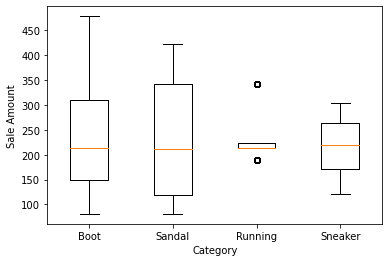

In [16]:
plt.boxplot([toy_products_df[toy_products_df['product_category'] == 'Boot']['sale_amount'], 
             toy_products_df[toy_products_df['product_category'] == 'Sandal']['sale_amount'],
             toy_products_df[toy_products_df['product_category'] == 'Running']['sale_amount'],
             toy_products_df[toy_products_df['product_category'] == 'Sneaker']['sale_amount']
            ])
plt.xticks([1, 2,3,4], ['Boot', 'Sandal', 'Running', 'Sneaker'])
plt.xlabel('Category')
plt.ylabel('Sale Amount')
plt.show()

In [17]:
# Count unique values of categoricals
toy_products_df['product_gender'].value_counts()

Unisex    625
Women     625
Men       625
Kids      625
Youth     625
Name: product_gender, dtype: int64

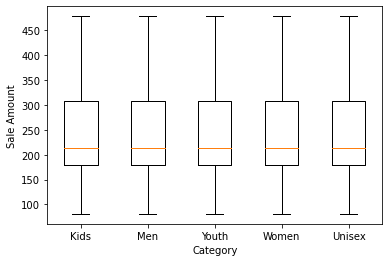

In [18]:
plt.boxplot([toy_products_df[toy_products_df['product_gender'] == 'Kids']['sale_amount'], 
             toy_products_df[toy_products_df['product_gender'] == 'Men']['sale_amount'],
             toy_products_df[toy_products_df['product_gender'] == 'Youth']['sale_amount'],
             toy_products_df[toy_products_df['product_gender'] == 'Women']['sale_amount'],
             toy_products_df[toy_products_df['product_gender'] == 'Unisex']['sale_amount']
            ])
plt.xticks([1, 2,3,4,5], ['Kids', 'Men', 'Youth', 'Women', 'Unisex'])
plt.xlabel('Category')
plt.ylabel('Sale Amount')
plt.show()

In [19]:
# Count unique values of categoricals
toy_products_df['product_color'].value_counts()

Mordant Red 19                  125
Electric Purple                 125
Pastel Magenta                  125
Burnt Sienna                    125
Alice Blue                      125
Canary Yellow                   125
Vermilion (Plochere)            125
Midnight Green (Eagle Green)    125
Dark Red                        125
Dartmouth Green                 125
Prussian Blue                   125
Sky Blue                        125
Stormcloud                      125
Yellow-Green                    125
Selective Yellow                125
Electric Green                  125
Lavender Purple                 125
Green (Munsell)                 125
Topaz                           125
Ruby Red                        125
Dark Powder Blue                125
Han Purple                      125
Fern Green                      125
Royal Blue (Web)                125
Mikado Yellow                   125
Name: product_color, dtype: int64

In [20]:
len(toy_products_df['product_color'].value_counts())

25

In [21]:
# quick math check
25*125

3125

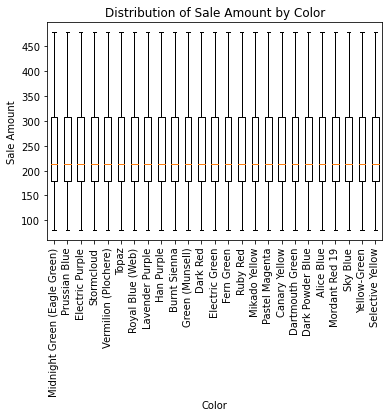

In [22]:
category_sale_amount = []
categories = toy_products_df['product_color'].unique()
for category in categories:
    category_sale_amount.append(toy_products_df[toy_products_df['product_color'] == category]['sale_amount'])
plt.boxplot(category_sale_amount, labels=categories)
plt.xticks(rotation=90)
plt.ylabel('Sale Amount')
plt.xlabel('Color')
plt.title('Distribution of Sale Amount by Color')
plt.show()

## Toy Dataset

In [24]:
toy_dataset_df.shape

(32151, 23)

In [25]:
toy_dataset_df.head()

,Unnamed: 0,timestamp,transaction_id,hash_customer,sale_amount,product_title,product_color,product_gender,product_category,product_size,referrer_source,point_of_sales,zip_tot_hh,zip_avg_hh_size,zip_avg_fam_size,zip_med_age,zip_male_female_ratio,zip_tot_pop,zip_tot_white_nh,zip_med_hh_income,zip_mean_hh_income,zip_pct_emp_lf,zip_unemp_rate
0,10,2019-10-17 17:00:00,13964574791861793493,118171218419602151,141.0,Rogue Sneaker,Midnight Green (Eagle Green),Women,Sneaker,11.0,Direct,Online Store,14957.0,1.81,2.55,56.9,109.0,27226.0,21301.0,73818.0,122494.0,54.7,5.6
1,11,2022-03-26 04:00:00,15462755904385104185,118171218419602151,262.0,Vanguard Sandal,Prussian Blue,Women,Sandal,11.0,Direct,Online Store,14957.0,1.81,2.55,56.9,109.0,27226.0,21301.0,73818.0,122494.0,54.7,5.6
2,12,2019-10-18 06:00:00,5418521222138237582,15372924648196696535,141.0,Rogue Sneaker,Electric Purple,Women,Sneaker,6.0,Direct,Online Store,11695.0,2.52,3.20,44.4,94.0,30274.0,23867.0,92031.0,135491.0,62.9,4.9
3,13,2021-10-03 19:00:00,13807911046559617059,15372924648196696535,147.0,Classic Sneaker,Electric Purple,Women,Sneaker,5.5,Direct,Online Store,11695.0,2.52,3.20,44.4,94.0,30274.0,23867.0,92031.0,135491.0,62.9,4.9
4,14,2019-10-18 09:00:00,17285359619674932653,10040016928726048703,194.0,Olympic Running,Stormcloud,Women,Running,11.5,Search,Online Store,8517.0,2.56,3.17,46.7,90.6,21848.0,18220.0,199598.0,345660.0,57.4,3.1


#### Point of Sales

In [23]:
# Count unique values of categoricals
toy_dataset_df['point_of_sales'].value_counts()

Online Store                     29338
Loop Returns                      1244
Point of Sale                      994
Flow Connect                       309
Returnly                           247
Shop                                10
Facebook                             6
Facebook Shop (discontinued)         2
Route - Protection & Tracking        1
Name: point_of_sales, dtype: int64

In [24]:
toy_dataset_df['point_of_sales'].value_counts() / toy_dataset_df.shape[0]

Online Store                     0.912507
Loop Returns                     0.038692
Point of Sale                    0.030917
Flow Connect                     0.009611
Returnly                         0.007682
Shop                             0.000311
Facebook                         0.000187
Facebook Shop (discontinued)     0.000062
Route - Protection & Tracking    0.000031
Name: point_of_sales, dtype: float64

In [25]:
# subset to only Online transactions
toy_dataset_df = toy_dataset_df[toy_dataset_df['point_of_sales']=='Online Store']

In [26]:
print(toy_dataset_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29338 entries, 0 to 32148
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             29338 non-null  int64  
 1   timestamp              29338 non-null  object 
 2   transaction_id         29338 non-null  uint64 
 3   hash_customer          29338 non-null  uint64 
 4   sale_amount            29338 non-null  float64
 5   product_title          29338 non-null  object 
 6   product_color          29338 non-null  object 
 7   product_gender         29338 non-null  object 
 8   product_category       29338 non-null  object 
 9   product_size           29270 non-null  float64
 10  referrer_source        29338 non-null  object 
 11  point_of_sales         29338 non-null  object 
 12  zip_tot_hh             29338 non-null  float64
 13  zip_avg_hh_size        29329 non-null  float64
 14  zip_avg_fam_size       29329 non-null  float64
 15  zi

#### Timestamp

In [27]:
toy_dataset_df['timestamp'] = pd.to_datetime(toy_dataset_df['timestamp'])

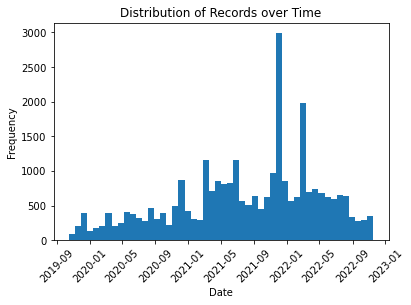

In [28]:
plt.hist(toy_dataset_df['timestamp'], bins=50)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Distribution of Records over Time')
plt.xticks(rotation=45)
plt.show()

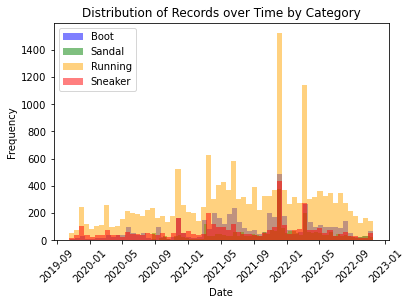

In [29]:
categories = ['Boot', 'Sandal', 'Running', 'Sneaker']
colors = ['blue', 'green', 'orange', 'red']

# Create histogram of records by datetime, with different colors for different categories
for i, category in enumerate(categories):
    plt.hist(toy_dataset_df[toy_dataset_df['product_category'] == category]['timestamp'],
             bins=60,
             alpha=0.5,
             label=category,
             color=colors[i])
plt.legend()
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Distribution of Records over Time by Category')
plt.show()

#### Transaction ID

In [30]:
toy_dataset_df['transaction_id'].nunique()

21245

In [31]:
# number of items per transaction
items_per_transaction = toy_dataset_df.groupby('transaction_id').size().reset_index(name='item_count')

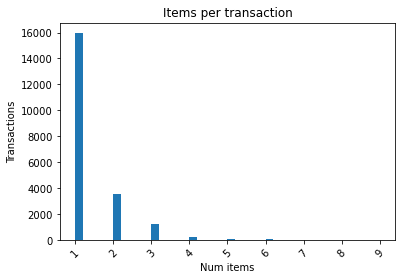

In [32]:
plt.hist(items_per_transaction[items_per_transaction['item_count']<10]['item_count'], bins=40)
plt.xlabel('Num items')
plt.ylabel('Transactions')
plt.title('Items per transaction')
plt.xticks(rotation=45)
plt.show()

In [33]:
item_counts = toy_dataset_df.groupby('transaction_id').size().value_counts()
total_transactions = item_counts.sum()
item_percentages = (item_counts / total_transactions) * 100
item_percentages = item_percentages.sort_index()
item_percentages[0:5]

1    75.095317
2    16.851024
3     5.789598
4     1.237938
5     0.414215
dtype: float64

#### Customer hash

In [35]:
toy_dataset_df['hash_customer'].nunique()

7527

In [36]:
# Add column for transaction number for each user
df_sorted = toy_dataset_df.sort_values('timestamp').groupby(['hash_customer', 'timestamp']).first().reset_index()
df_sorted['transaction_num'] = df_sorted.groupby('hash_customer', sort=False)['timestamp'].rank(method='dense')
# Merge the transaction number back into the original dataframe
toy_dataset_df = toy_dataset_df.merge(df_sorted[['hash_customer', 'timestamp', 'transaction_num']], 
                                      on=['hash_customer', 'timestamp'])

In [37]:
transaction_num_counts = toy_dataset_df.groupby('transaction_num').size() / toy_dataset_df.shape[0] * 100.0

In [39]:
# percent of transactions that are the user's nth purchase
transaction_num_counts[0:10]

transaction_num
1.0     36.222646
2.0     25.983366
3.0     12.846820
4.0      7.290886
5.0      4.547004
6.0      3.169950
7.0      1.994001
8.0      1.581567
9.0      1.107778
10.0     0.927125
dtype: float64

In [40]:
# Number of transactions per user
transactions_per_user = toy_dataset_df.groupby('hash_customer')['transaction_id'].nunique().reset_index()
transactions_per_user.columns = ['hash_customer', 'transaction_count']

In [41]:
user_transaction_counts = transactions_per_user.groupby('transaction_count').size() / toy_dataset_df['hash_customer'].nunique() * 100.0

In [42]:
user_transaction_counts[0:10]

transaction_count
1     20.685532
2     41.384350
3     17.563438
4      8.117444
5      4.224791
6      2.577388
7      1.448120
8      1.208981
9      0.664275
10     0.518135
dtype: float64

In [53]:
sum(user_transaction_counts[0:4])

87.75076391656702

In [ ]:
# 20% of users have only made 1 purchase
# 41% of users have made 2 purchases
# 62% of users have made fewer than 3 purchases
# 80% of users have made 3 or fewer purchases
# 88% of users have made 4 or fewer purchases

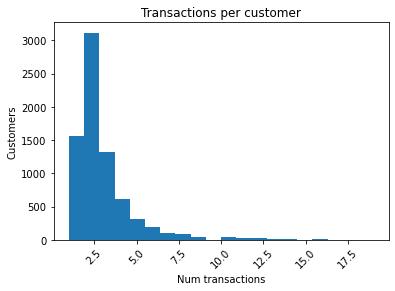

In [54]:
plt.hist(transactions_per_user[transactions_per_user['transaction_count']<20]['transaction_count'], 
         bins=20)
plt.xlabel('Num transactions')
plt.ylabel('Customers')
plt.title('Transactions per customer')
plt.xticks(rotation=45)
plt.show()

In [55]:
# outlier purchaser - not online sales
# toy_dataset_df[toy_dataset_df['hash_customer']==934772523603658765]['transaction_id'].nunique()

In [56]:
purchase_fields = ['hash_customer', 'product_title', 'product_category', 
                   'product_gender', 'product_color']

first_purchase_df = toy_dataset_df[toy_dataset_df['transaction_num']==1][purchase_fields]
second_purchase_df = toy_dataset_df[toy_dataset_df['transaction_num']==2][purchase_fields]

first_purchase_df.columns = ['hash_customer', 'first_product_title', 'first_product_category', 
                   'first_product_gender', 'first_product_color']

second_purchase_df.columns = ['hash_customer', 'second_product_title', 'second_product_category', 
                   'second_product_gender', 'second_product_color']

In [57]:
purchase_path_df = pd.merge(left=first_purchase_df, 
                            right=second_purchase_df, 
                            on='hash_customer', 
                            how='inner')

In [58]:
purchase_path_df.head()

,hash_customer,first_product_title,first_product_category,first_product_gender,first_product_color,second_product_title,second_product_category,second_product_gender,second_product_color
0,118171218419602151,Rogue Sneaker,Sneaker,Women,Midnight Green (Eagle Green),Vanguard Sandal,Sandal,Women,Prussian Blue
1,15372924648196696535,Rogue Sneaker,Sneaker,Women,Electric Purple,Classic Sneaker,Sneaker,Women,Electric Purple
2,10040016928726048703,Olympic Running,Running,Women,Stormcloud,Vanguard Sandal,Sandal,Men,Vermilion (Plochere)
3,10040016928726048703,Iron Running,Running,Men,Vermilion (Plochere),Vanguard Sandal,Sandal,Men,Vermilion (Plochere)
4,1043293858936909271,Iron Running,Running,Women,Topaz,Olympic Running,Running,Women,Electric Purple


In [59]:
# product_gender transition
transition_df = pd.DataFrame(purchase_path_df[['first_product_gender', 'second_product_gender']].value_counts().reset_index())
transition_df.columns = ['first_product_gender', 'second_product_gender', 'count']
transition_df.head(10)

,first_product_gender,second_product_gender,count
0,Women,Women,5632
1,Men,Men,1828
2,Women,Men,946
3,Men,Women,870
4,Kids,Women,533
5,Kids,Kids,148
6,Women,Kids,137
7,Youth,Women,102
8,Women,Youth,97
9,Youth,Youth,93


In [60]:
# category transition
transition_df = pd.DataFrame(purchase_path_df[['first_product_category', 'second_product_category']].value_counts().reset_index())
transition_df.columns = ['first_product_category', 'second_product_category', 'count']
transition_df.head(10)

,first_product_category,second_product_category,count
0,Running,Running,4632
1,Running,Boot,938
2,Boot,Boot,878
3,Sneaker,Running,762
4,Sneaker,Sneaker,717
5,Running,Sneaker,643
6,Running,Sandal,494
7,Boot,Running,460
8,Sandal,Sandal,266
9,Sandal,Running,256


#### Sale Amount

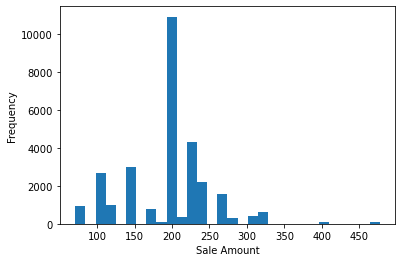

In [61]:
# Visualize the distribution of sale amounts using a histogram
plt.hist(toy_dataset_df['sale_amount'], bins=30)
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.show()

In [62]:
# TODO - create transaction total sale_amount aggregtaion

#### Product Title

In [74]:
# Count unique values of categoricals
toy_dataset_df['product_title'].value_counts()

Olympic Running        9293
Iron Running           4205
League Running         3532
Hustler Boot           3251
Classic Sneaker        2080
Rogue Sneaker          1996
Vanguard Sandal        1989
Stacked Hiking Boot    1431
Scalar Sandal           554
Marathon Running        300
Original Boot           198
Corner Sandal           125
Evermore Boot           123
Gator Sandal            114
Bejeweled Boot           79
Training Sneaker         49
Alley Boot                9
Discrete Sandal           6
Roundup Boot              4
Name: product_title, dtype: int64

In [75]:
toy_dataset_df['product_title'].value_counts() / toy_dataset_df.shape[0]

Olympic Running        0.316756
Iron Running           0.143329
League Running         0.120390
Hustler Boot           0.110812
Classic Sneaker        0.070898
Rogue Sneaker          0.068035
Vanguard Sandal        0.067796
Stacked Hiking Boot    0.048776
Scalar Sandal          0.018883
Marathon Running       0.010226
Original Boot          0.006749
Corner Sandal          0.004261
Evermore Boot          0.004193
Gator Sandal           0.003886
Bejeweled Boot         0.002693
Training Sneaker       0.001670
Alley Boot             0.000307
Discrete Sandal        0.000205
Roundup Boot           0.000136
Name: product_title, dtype: float64

In [76]:
toy_dataset_df['product_title'].unique()

array(['Rogue Sneaker', 'Vanguard Sandal', 'Classic Sneaker',
       'Olympic Running', 'Iron Running', 'Hustler Boot',
       'League Running', 'Original Boot', 'Evermore Boot',
       'Stacked Hiking Boot', 'Scalar Sandal', 'Gator Sandal',
       'Marathon Running', 'Roundup Boot', 'Training Sneaker',
       'Bejeweled Boot', 'Alley Boot', 'Corner Sandal', 'Discrete Sandal'],
      dtype=object)

In [77]:
len(toy_dataset_df['product_title'].value_counts())

19

In [78]:
# Products in catalog, no transactions
toy_products_df[~toy_products_df['product_title'].isin(toy_dataset_df['product_title'].unique())]['product_title'].unique()

array(['Envy Sandal', 'Forest Sandal', 'Boost Boot', 'Gradient Sneaker',
       'Descent Running', 'Naive Boot'], dtype=object)

#### Product Color

In [79]:
# Count unique values of categoricals
toy_dataset_df['product_color'].value_counts()

Lavender Purple                 1229
Dark Red                        1218
Sky Blue                        1214
Burnt Sienna                    1203
Green (Munsell)                 1201
Midnight Green (Eagle Green)    1198
Prussian Blue                   1193
Ruby Red                        1193
Stormcloud                      1190
Mordant Red 19                  1186
Fern Green                      1185
Vermilion (Plochere)            1180
Mikado Yellow                   1179
Canary Yellow                   1175
Selective Yellow                1174
Alice Blue                      1169
Topaz                           1167
Han Purple                      1166
Electric Green                  1152
Royal Blue (Web)                1149
Pastel Magenta                  1132
Dartmouth Green                 1130
Electric Purple                 1124
Dark Powder Blue                1123
Yellow-Green                    1108
Name: product_color, dtype: int64

In [80]:
toy_dataset_df['product_color'].value_counts() / toy_dataset_df.shape[0]

Lavender Purple                 0.041891
Dark Red                        0.041516
Sky Blue                        0.041380
Burnt Sienna                    0.041005
Green (Munsell)                 0.040937
Midnight Green (Eagle Green)    0.040834
Prussian Blue                   0.040664
Ruby Red                        0.040664
Stormcloud                      0.040562
Mordant Red 19                  0.040425
Fern Green                      0.040391
Vermilion (Plochere)            0.040221
Mikado Yellow                   0.040187
Canary Yellow                   0.040050
Selective Yellow                0.040016
Alice Blue                      0.039846
Topaz                           0.039778
Han Purple                      0.039744
Electric Green                  0.039266
Royal Blue (Web)                0.039164
Pastel Magenta                  0.038585
Dartmouth Green                 0.038517
Electric Purple                 0.038312
Dark Powder Blue                0.038278
Yellow-Green    

In [81]:
pd.crosstab(toy_dataset_df['product_color'], toy_dataset_df['product_gender'])
# pd.crosstab(toy_dataset_df['product_color'], toy_dataset_df['product_category'])

product_gender,Kids,Men,Unisex,Women,Youth
product_color,,,,,
Alice Blue,44,285,7,794,39
Burnt Sienna,48,315,15,795,30
Canary Yellow,49,299,19,778,30
Dark Powder Blue,30,271,10,771,41
Dark Red,61,304,12,811,30
Dartmouth Green,50,273,12,755,40
Electric Green,44,290,14,776,28
Electric Purple,43,274,15,767,25
Fern Green,48,277,11,819,30


#### Product Gender

In [82]:
# Count unique values of categoricals
# toy_dataset_df['product_gender'].value_counts()
toy_dataset_df['product_gender'].value_counts() / toy_dataset_df.shape[0]

Women     0.674518
Men       0.246847
Kids      0.038585
Youth     0.029211
Unisex    0.010839
Name: product_gender, dtype: float64

#### Product Category

In [83]:
# Count unique values of categoricals
toy_dataset_df['product_category'].value_counts()

Running    17330
Boot        5095
Sneaker     4125
Sandal      2788
Name: product_category, dtype: int64

In [84]:
toy_dataset_df['product_category'].value_counts() / toy_dataset_df.shape[0]

Running    0.590701
Boot       0.173666
Sneaker    0.140603
Sandal     0.095030
Name: product_category, dtype: float64

#### Product Size

<AxesSubplot:>

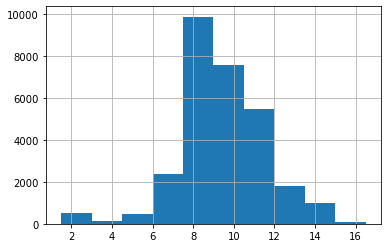

In [85]:
# Count unique values of categoricals
toy_dataset_df['product_size'].hist()

#### Referrer Source

In [86]:
# Count unique values of categoricals
toy_dataset_df['referrer_source'].value_counts()

Direct     18114
Search      9026
Social      1528
Unknown      652
Email         18
Name: referrer_source, dtype: int64

In [87]:
toy_dataset_df['referrer_source'].value_counts() / toy_dataset_df.shape[0]

Direct     0.617425
Search     0.307656
Social     0.052083
Unknown    0.022224
Email      0.000614
Name: referrer_source, dtype: float64

In [ ]:
# TODO - EDA on Zip columns

In [ ]:
# TODO: Explore Seasonality